In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Tugas tugas/datasetzzz.csv', sep=';')

In [3]:
df.head()

,Kabupaten/Kota,Pencurian,Pencurian dengan Kekerasan,Penipuan/Penggelapan,Penganiayaan,Pembakaran,Perkosaan/Kejahatan terhadap Kesusilaan,Penyalahgunaan/Pengedaran Narkoba,Perjudian,Pembunuhan,Perdagangan Orang,Korupsi,Jumlah
0,Pacitan,24,-,2,1,1,-,2,4,-,-,1,142
1,Ponorogo,41,1,5,5,2,2,6,19,-,-,-,244
2,Trenggalek,34,1,19,6,1,2,12,8,2,-,-,100
3,Tulungagung,72,1,26,10,-,7,34,24,1,-,1,173
4,Blitar,148,13,56,17,-,11,39,50,4,1,2,85


In [4]:
df = df.replace('-', 0)

In [5]:
df.head()

,Kabupaten/Kota,Pencurian,Pencurian dengan Kekerasan,Penipuan/Penggelapan,Penganiayaan,Pembakaran,Perkosaan/Kejahatan terhadap Kesusilaan,Penyalahgunaan/Pengedaran Narkoba,Perjudian,Pembunuhan,Perdagangan Orang,Korupsi,Jumlah
0,Pacitan,24,0,2,1,1,0,2,4,0,0,1,142
1,Ponorogo,41,1,5,5,2,2,6,19,0,0,0,244
2,Trenggalek,34,1,19,6,1,2,12,8,2,0,0,100
3,Tulungagung,72,1,26,10,0,7,34,24,1,0,1,173
4,Blitar,148,13,56,17,0,11,39,50,4,1,2,85


In [6]:
df.columns


Index(['Kabupaten/Kota ', 'Pencurian', 'Pencurian dengan Kekerasan',
       'Penipuan/Penggelapan ', 'Penganiayaan', 'Pembakaran',
       'Perkosaan/Kejahatan terhadap Kesusilaan',
       'Penyalahgunaan/Pengedaran Narkoba', 'Perjudian', 'Pembunuhan',
       'Perdagangan Orang', 'Korupsi', 'Jumlah'],
      dtype='object')

In [7]:
df.rename(columns={"Kabupaten/Kota ": "Kabupaten/Kota"}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Kabupaten/Kota                           39 non-null     object
 1   Pencurian                                39 non-null     object
 2   Pencurian dengan Kekerasan               39 non-null     object
 3   Penipuan/Penggelapan                     39 non-null     object
 4   Penganiayaan                             39 non-null     object
 5   Pembakaran                               39 non-null     object
 6   Perkosaan/Kejahatan terhadap Kesusilaan  39 non-null     object
 7   Penyalahgunaan/Pengedaran Narkoba        39 non-null     object
 8   Perjudian                                39 non-null     object
 9   Pembunuhan                               39 non-null     object
 10  Perdagangan Orang                        39 non-null     object


In [9]:
df = df[df["Kabupaten/Kota"].str.upper() != "JAWA TIMUR"]

In [10]:
for col in df.columns[1:]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(" ", "", regex=False)
        .str.replace(".", "", regex=False)
        .astype(int)
    )

In [11]:
df.head()

,Kabupaten/Kota,Pencurian,Pencurian dengan Kekerasan,Penipuan/Penggelapan,Penganiayaan,Pembakaran,Perkosaan/Kejahatan terhadap Kesusilaan,Penyalahgunaan/Pengedaran Narkoba,Perjudian,Pembunuhan,Perdagangan Orang,Korupsi,Jumlah
0,Pacitan,24,0,2,1,1,0,2,4,0,0,1,142
1,Ponorogo,41,1,5,5,2,2,6,19,0,0,0,244
2,Trenggalek,34,1,19,6,1,2,12,8,2,0,0,100
3,Tulungagung,72,1,26,10,0,7,34,24,1,0,1,173
4,Blitar,148,13,56,17,0,11,39,50,4,1,2,85


In [12]:
mean_jumlah = df["Jumlah"].mean()
print("\nRata-rata Jumlah:", mean_jumlah)

# 1 = RAWAN, 0 = AMAN
df["label"] = df["Jumlah"].apply(lambda x: 1 if x > mean_jumlah else 0)


Rata-rata Jumlah: 100.02631578947368


In [13]:
df.head()

,Kabupaten/Kota,Pencurian,Pencurian dengan Kekerasan,Penipuan/Penggelapan,Penganiayaan,Pembakaran,Perkosaan/Kejahatan terhadap Kesusilaan,Penyalahgunaan/Pengedaran Narkoba,Perjudian,Pembunuhan,Perdagangan Orang,Korupsi,Jumlah,label
0,Pacitan,24,0,2,1,1,0,2,4,0,0,1,142,1
1,Ponorogo,41,1,5,5,2,2,6,19,0,0,0,244,1
2,Trenggalek,34,1,19,6,1,2,12,8,2,0,0,100,0
3,Tulungagung,72,1,26,10,0,7,34,24,1,0,1,173,1
4,Blitar,148,13,56,17,0,11,39,50,4,1,2,85,0


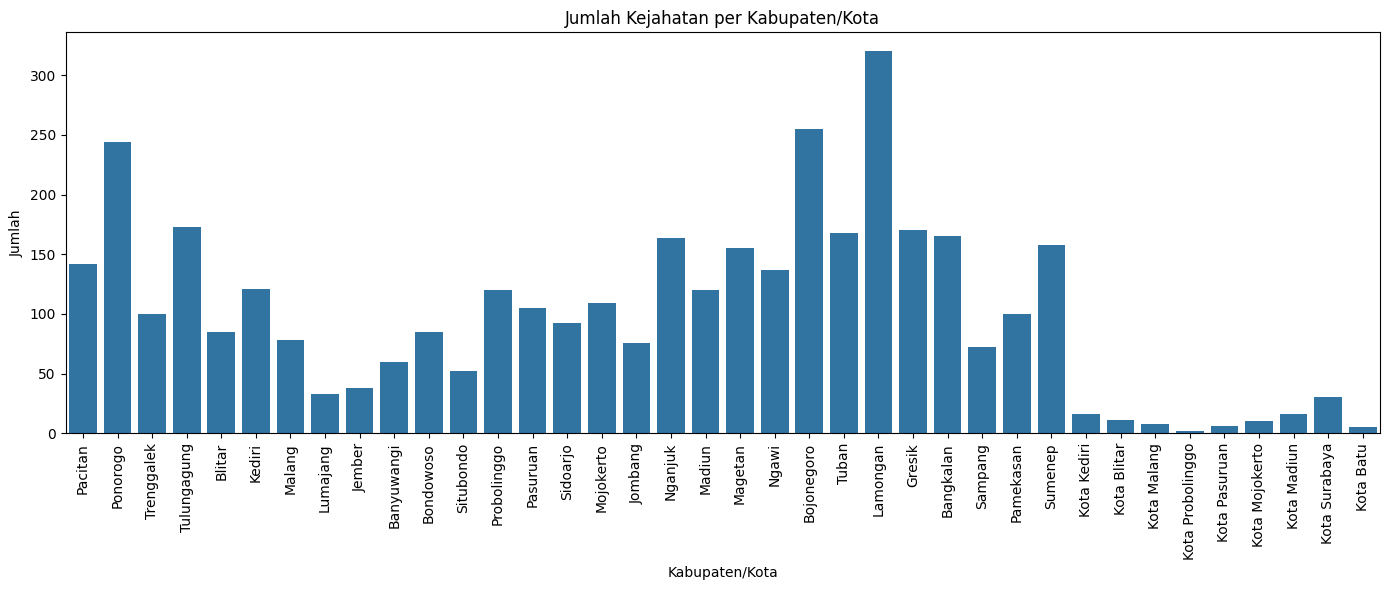

In [14]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x="Kabupaten/Kota", y="Jumlah")
plt.xticks(rotation=90)
plt.title("Jumlah Kejahatan per Kabupaten/Kota")
plt.tight_layout()
plt.show()

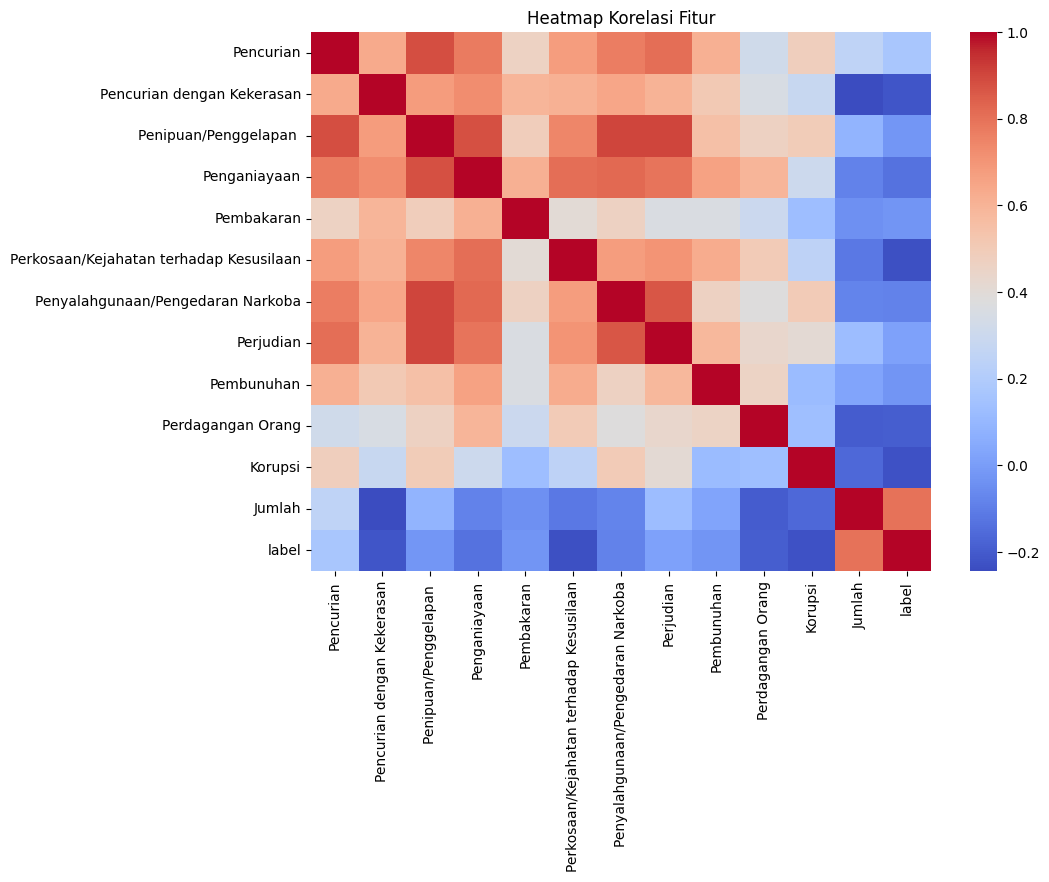

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.drop(columns=["Kabupaten/Kota"]).corr(), annot=False, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [16]:
X = df.drop(columns=["Kabupaten/Kota", "label"])
y = df["label"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_test_scaled)

print("\n=== AKURASI MODEL ===")
print(accuracy_score(y_test, y_pred))

print("\n=== CLASSIFICATION REPORT ===")

# Handle jika hanya 1 kelas muncul di test set
unique_classes = np.unique(y_test)
print(classification_report(y_test, y_pred, labels=unique_classes,
                            target_names=["Aman" if c == 0 else "Rawan" for c in unique_classes]))


=== AKURASI MODEL ===
0.625

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

        Aman       0.83      0.71      0.77         7
       Rawan       0.00      0.00      0.00         1

    accuracy                           0.62         8
   macro avg       0.42      0.36      0.38         8
weighted avg       0.73      0.62      0.67         8



In [21]:
df["Prediksi"] = knn.predict(scaler.transform(X))
df["Prediksi"] = df["Prediksi"].apply(lambda x: "Daerah Rawan" if x == 1 else "Daerah Aman")

print("\n=== HASIL PREDIKSI ===")
display(df[["Kabupaten/Kota", "Jumlah", "Prediksi"]])


=== HASIL PREDIKSI ===


,Kabupaten/Kota,Jumlah,Prediksi
0,Pacitan,142,Daerah Rawan
1,Ponorogo,244,Daerah Rawan
2,Trenggalek,100,Daerah Rawan
3,Tulungagung,173,Daerah Rawan
4,Blitar,85,Daerah Rawan
5,Kediri,121,Daerah Rawan
6,Malang,78,Daerah Aman
7,Lumajang,33,Daerah Rawan
8,Jember,38,Daerah Aman
9,Banyuwangi,60,Daerah Rawan


In [22]:
filename = 'model.sav'
pickle.dump(knn,open(filename,'wb'))